In [223]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.model_selection import KFold
import os
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split


In [224]:
df = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\KNN\Zoo.csv")

In [225]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [226]:
#checking for info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [227]:
#checking with descriptive statistics
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [228]:
#checking if any correlation 
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [229]:
#checking the shape of the data 
df.shape

(101, 18)

# EDA and Visualization

Text(0, 0.5, 'frequency')

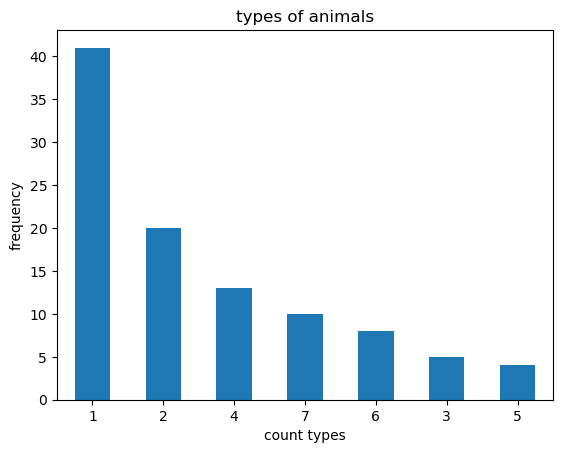

In [230]:
#checking the count for our dependent variable
type_class = pd.value_counts(df['type'],sort= True,ascending= False)
type_class.plot(kind = 'bar',rot = 0)
plt.title("types of animals")
plt.xlabel("count types")
plt.xticks(range(7))
plt.ylabel("frequency")

In [231]:
#cheking with the value counts 
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [232]:
## since its perfectly balanced we dont need smote technique for dependent variable ##

Text(0, 0.5, 'frequency')

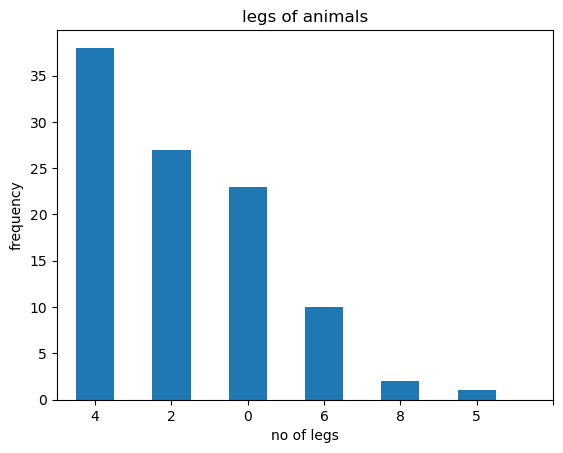

In [233]:
#checking the count for our independent variable
legs_class = pd.value_counts(df['legs'],sort= True,ascending= False)
legs_class.plot(kind = 'bar',rot = 0)
plt.title("legs of animals")
plt.xlabel("no of legs")
plt.xticks(range(7))
plt.ylabel("frequency")

In [234]:
#checking with the value counts 
df['legs'].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

Text(0, 0.5, 'frequency')

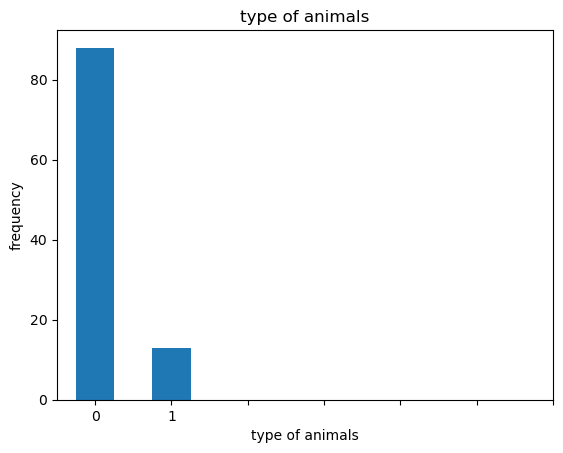

In [235]:
#checking the count for our independent variable
domestic = pd.value_counts(df['domestic'],sort= True,ascending= False)
domestic.plot(kind = 'bar',rot = 0)
plt.title("type of animals")
plt.xlabel("type of animals")
plt.xticks(range(7))
plt.ylabel("frequency")

In [236]:
#checking with the value counts 
df['domestic'].value_counts()

0    88
1    13
Name: domestic, dtype: int64

Text(0, 0.5, 'frequency')

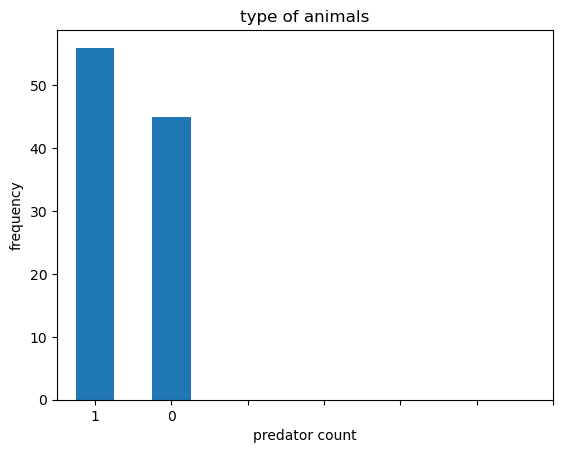

In [251]:
#checking the count for our independent variable
predator = pd.value_counts(df['predator'],sort= True,ascending= False)
predator.plot(kind = 'bar',rot = 0)
plt.title("type of animals")
plt.xlabel("predator count")
plt.xticks(range(7))
plt.ylabel("frequency")

In [238]:
#checking with the value counts 
df['predator'].value_counts()

1    56
0    45
Name: predator, dtype: int64

Text(0, 0.5, 'frequency')

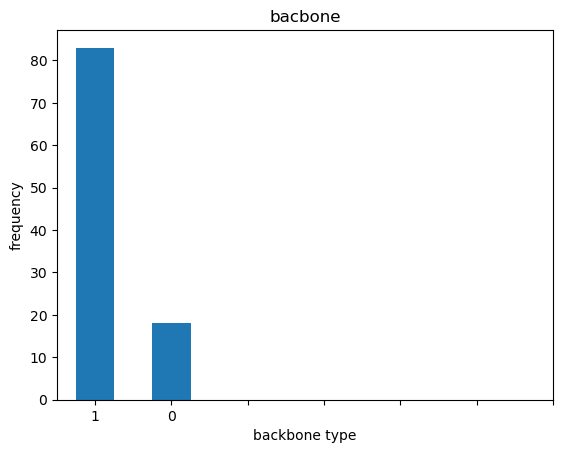

In [239]:
#checking the count for our independent variable
backbone = pd.value_counts(df['backbone'],sort= True,ascending= False)
backbone.plot(kind = 'bar',rot = 0)
plt.title("bacbone")
plt.xlabel("backbone type")
plt.xticks(range(7))
plt.ylabel("frequency")

In [240]:
#checking with the value counts 
df['backbone'].value_counts()

1    83
0    18
Name: backbone, dtype: int64

Text(0, 0.5, 'frequency')

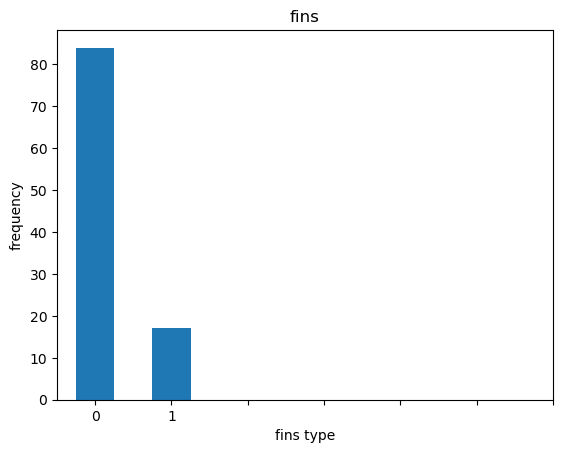

In [241]:
#checking the count for our independent variable
fins = pd.value_counts(df['fins'],sort= True,ascending= False)
fins.plot(kind = 'bar',rot = 0)
plt.title("fins")
plt.xlabel("fins type")
plt.xticks(range(7))
plt.ylabel("frequency")

In [242]:
#checking with the value counts 
df['fins'].value_counts()

0    84
1    17
Name: fins, dtype: int64

# using Kneighbors classifier to find the k value

In [244]:
#splitting our data into independent and dependent
array= df1.values
X = array[:,0:16]
y = array[:,16]

In [245]:
k_range = range(1,40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,X,y,cv=10,error_score='raise')
    k_scores.append(scores.mean())

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

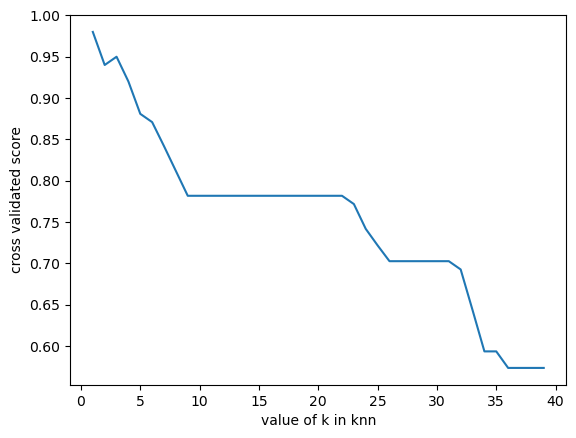

In [246]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k in knn')
plt.ylabel('cross validated score')
plt.show()

In [247]:
#checking accuracy with gridsearch cv 
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [248]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model,param_grid=param_grid)
grid.fit(X,y)

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this beh

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [249]:
#printing the best parameters
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.97


In [253]:
#visualizing with cv results to check
k_range = range(1,30)
k_scores = []


In [254]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores =cross_val_score(knn,X,y,cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

In [255]:
pd.Series(k_scores).sort_values(ascending=False)

0     0.980000
2     0.950000
1     0.940000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
15    0.781818
21    0.781818
20    0.781818
19    0.781818
18    0.781818
17    0.781818
16    0.781818
14    0.781818
13    0.781818
12    0.781818
11    0.781818
10    0.781818
9     0.781818
8     0.781818
22    0.771818
23    0.741818
24    0.721818
25    0.702727
26    0.702727
27    0.702727
28    0.702727
dtype: float64

In [257]:
#plotting for error rate vs k value 
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X,y)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != y))

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

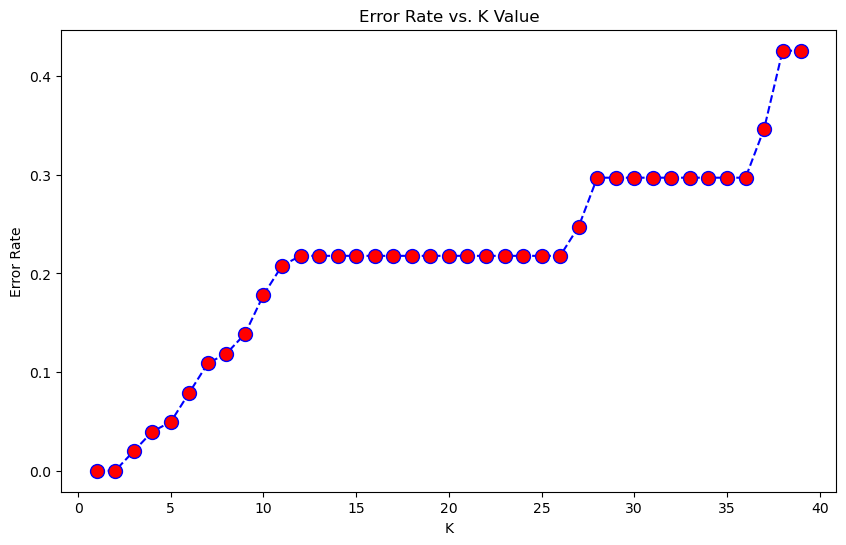

In [258]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [259]:
## as we can say at 0 and 1 our error is least so we go ahead with K = 1 ##

In [261]:
#implementing knn with k = 1
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X,y)
pred = knn.predict(X)

C:\Users\Adith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [262]:
pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [263]:
print(confusion_matrix(y,pred))

[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 10]]


In [264]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

